In [32]:
#웹 페이지 열기
import time
import os
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By

import requests
import csv
import urllib.request
import urllib.parse
import re
from bs4 import BeautifulSoup

In [33]:
dr = webdriver.Chrome('C:/Users/USER/Downloads/chromedriver_win32/chromedriver.exe') # 크롬 드라이버를 실행하는 명령어를 dr로 지정
dr.get('https://google.co.kr/')  # 드라이버를 통해 url의 웹 페이지를 오픈
time.sleep(1)

xpath_text = '/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/input'
xpath_button = '/html/body/div[1]/div[3]/form/div[1]/div[1]/div[4]/center/input[1]'
keyword = '버스 내 사고'

dr.find_element(By.XPATH,xpath_text).send_keys(keyword)
dr.find_element(By.XPATH,xpath_button).send_keys(Keys.ENTER)



C:\Users\USER\AppData\Local\Temp\ipykernel_1808\3050792653.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  dr = webdriver.Chrome('C:/Users/USER/Downloads/chromedriver_win32/chromedriver.exe') # 크롬 드라이버를 실행하는 명령어를 dr로 지정


In [34]:
html = dr.page_source
soup = BeautifulSoup(html, 'html.parser')
time.sleep(1)
text_list = []

for text in soup.find_all('div', attrs={'class': 'Z26q7c UK95Uc'}):
    text_list.append(text.text)
#     print(text.text[:10])

In [148]:
# xpath
# //*[@id="botstuff"]/div/div[2]/table/tbody/tr/td[3]/a 
# //*[@id="botstuff"]/div/div[2]/table/tbody/tr/td[4]/a
# //*[@id="botstuff"]/div/div[2]/table/tbody/tr/td[5]/a page 4

# //*[@id="pnnext"]/span[2] next page

In [35]:
for i in range(2,10):
    xpath_pagenum = f'//*[@id="botstuff"]/div/div[2]/table/tbody/tr/td[{i+1}]/a'
    
    dr.find_element(By.XPATH,xpath_pagenum).send_keys(Keys.ENTER)
    time.sleep(3)
    
    html = dr.page_source
    soup = BeautifulSoup(html, 'html.parser') 
    
    for text in soup.find_all('div', attrs={'class': 'Z26q7c UK95Uc'}):
        text_list.append(text.text)


In [36]:
len(text_list)

102

In [37]:
text_list

['2022. 1. 19. — 대부분의 버스 내 안전사고는 버스의 움직임에 승객이 부주의하거나 미처 대처하지 못한 상황에서 주로 발생한다. 버스가 운행 중이므로 움직임이 없을 수\xa0...',
 '버스 승객 사고 보상버스 교통사고버스 접촉사고버스 승객 사고 합의금버스 급정거 사고버스 교통사고 보상함께 검색한 항목',
 '2021. 1. 6. — 시민들의 안전하고 편리한 이동을 위한 대중교통시설. 그중에서도 버스는 이동 중 사고 발생의 위험이 높은데요. 통계에 따르면 시내버스 교통사고만\xa0...',
 '버스 승객 사고 보상버스 교통사고버스 접촉사고버스 승객 사고 합의금버스 급정거 사고버스 교통사고 보상함께 검색한 항목',
 '차내 안전사고는 운전자의 과실이나 부주의로 인해 탑승객이나 동승자가 부상당하는 경우를 말한다. 교통사고는 도로교통법, 교통사고처리특례법, 특정범죄가중처벌등에\xa0...',
 '버스 승객 사고 보상버스 교통사고버스 접촉사고버스 승객 사고 합의금버스 급정거 사고버스 교통사고 보상함께 검색한 항목',
 '2021. 12. 1. — 버스 안에서 사고가 났을 땐 전국 시내·시외 버스회사 대부분이 가입한 전국버스공제조합이 주로 보험사 역할을 맡아 승객의 고의 여부와 과실 정도를\xa0...',
 '버스 승객 사고 보상버스 교통사고버스 접촉사고버스 승객 사고 합의금버스 급정거 사고버스 교통사고 보상함께 검색한 항목',
 '버스 출퇴근 중 사고, 지하철 출퇴근 중 사고, 대중교통사고 피해보상, 버스공제조합 ... 여객의 안전을 확보하기 위하여 필요한 경우 철도차량 내 여객을 대피시킬 것.',
 '버스 승객 사고 보상버스 교통사고버스 접촉사고버스 승객 사고 합의금버스 급정거 사고버스 교통사고 보상함께 검색한 항목',
 "2021. 1. 30. — 한국운수산업연구원에서 낸 '버스 차내 안전사고 감소방안 연구'(2019)에 따르면 2016년부터 2018년 사이 발생한 버스 교통사고 중 승하차 사고는\xa0...",
 '버스 승객 사고 보상버스 교통사고버

In [38]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from konlpy.tag import Okt
from PIL import Image
import numpy as np

In [39]:
result = ' '.join(s for s in text_list)

In [40]:
result

'2022. 1. 19. — 대부분의 버스 내 안전사고는 버스의 움직임에 승객이 부주의하거나 미처 대처하지 못한 상황에서 주로 발생한다. 버스가 운행 중이므로 움직임이 없을 수\xa0... 버스 승객 사고 보상버스 교통사고버스 접촉사고버스 승객 사고 합의금버스 급정거 사고버스 교통사고 보상함께 검색한 항목 2021. 1. 6. — 시민들의 안전하고 편리한 이동을 위한 대중교통시설. 그중에서도 버스는 이동 중 사고 발생의 위험이 높은데요. 통계에 따르면 시내버스 교통사고만\xa0... 버스 승객 사고 보상버스 교통사고버스 접촉사고버스 승객 사고 합의금버스 급정거 사고버스 교통사고 보상함께 검색한 항목 차내 안전사고는 운전자의 과실이나 부주의로 인해 탑승객이나 동승자가 부상당하는 경우를 말한다. 교통사고는 도로교통법, 교통사고처리특례법, 특정범죄가중처벌등에\xa0... 버스 승객 사고 보상버스 교통사고버스 접촉사고버스 승객 사고 합의금버스 급정거 사고버스 교통사고 보상함께 검색한 항목 2021. 12. 1. — 버스 안에서 사고가 났을 땐 전국 시내·시외 버스회사 대부분이 가입한 전국버스공제조합이 주로 보험사 역할을 맡아 승객의 고의 여부와 과실 정도를\xa0... 버스 승객 사고 보상버스 교통사고버스 접촉사고버스 승객 사고 합의금버스 급정거 사고버스 교통사고 보상함께 검색한 항목 버스 출퇴근 중 사고, 지하철 출퇴근 중 사고, 대중교통사고 피해보상, 버스공제조합 ... 여객의 안전을 확보하기 위하여 필요한 경우 철도차량 내 여객을 대피시킬 것. 버스 승객 사고 보상버스 교통사고버스 접촉사고버스 승객 사고 합의금버스 급정거 사고버스 교통사고 보상함께 검색한 항목 2021. 1. 30. — 한국운수산업연구원에서 낸 \'버스 차내 안전사고 감소방안 연구\'(2019)에 따르면 2016년부터 2018년 사이 발생한 버스 교통사고 중 승하차 사고는\xa0... 버스 승객 사고 보상버스 교통사고버스 접촉사고버스 승객 사고 합의금버스 급정거 사고버스 교통사고 보상함께 검색한

In [41]:
okt = Okt()
nouns = okt.nouns(result) # 명사만 추출

words = [n for n in nouns if len(n) > 1 and n != '버스'] # 단어의 길이가 1개인 것은 제외

c = Counter(words) # 위에서 얻은 words를 처리하여 단어별 빈도수 형태의 딕셔너리 데이터를 구함

In [42]:
from PIL import Image

In [43]:
im = Image.open('bus_crawling.png') # 이미지 파일 읽어오기
mask_arr = np.array(im) # 픽셀 값 배열 형태 변환

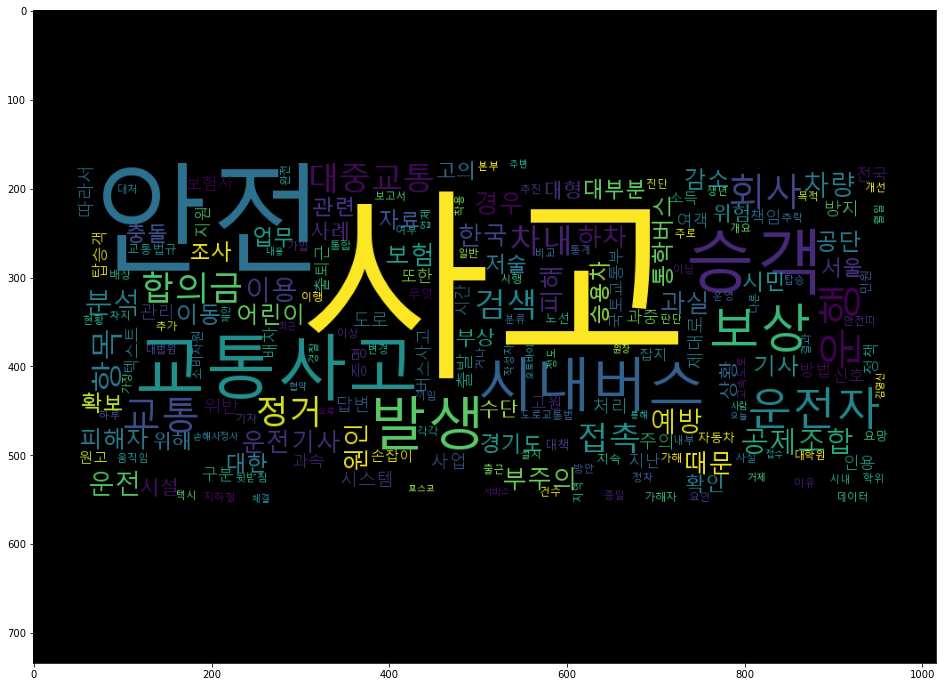

In [44]:
wc = WordCloud(font_path='malgun', width=400, height=400, scale=2.0, max_font_size=250, mask=mask_arr)
gen = wc.generate_from_frequencies(c)
plt.figure(figsize=(20,12))
plt.imshow(gen)